# Глубокое обучение и вообще:  практическое домашнее задание 3

## Общая информация

__Дата выдачи:__ 10.05.2022

__Мягкий дедлайн:__ 23:59MSK 22.05.2022

__Жесткий дедлайн:__ 23:59MSK 29.05.2022

## О задании

Это задание будет состоять из нескольких частей. Я пытался сделать их максимально независимыми друг от друга. Если вам не хочется делать какую-то из частей, смело её пропускайте.

- __[1 балл]__ Подготовка данных. Нужно скачать данные и разложить их по папочкам. Всё надо делать кодом в python. 
- __[2 балла]__ Поставка данных. В этой части вам предстоит написать несколько итераторов для поставки данных.
- __[3 балла]__ Напишите собственные архитектуры для обучения моделей.
- __[1 балл]__ Пробуем визуализировать эмбеддинги картинок.
- __[2 балла]__ Пробуем transfer learning и аугментацию.
- __[1 балл]__ Пробуем файнтьюнинг
- __[3 балла]__ Пробуем визуализировть отдельные слои. Это бонусный раздел.

Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании. 

Обязательно пишите развернутые текстовые комментарии там, где это требуется. При их отсутствии будет сниматься от $50%$ баллов за задание.

> Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят.

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

[FAQ по колабу](https://research.google.com/colaboratory/faq.html#idle-timeouts)

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 13 баллов. Сдавать задание после жёсткого дедлайна нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

## Формат сдачи

Задания сдаются через google-форму. Она будет опубликована на [странице курса](https://github.com/FUlyankin/deep_learning_tf) и в канале. В форму необходимо загрузить ноутбук с выполенным заданием. Сам ноутбук называйте в формате hw-03-tf-Username.ipynb, где Username — ваши фамилия и имя.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

__Оценка:__ xx

-------------

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style

import os

In [ ]:
from typing import List, Tuple

In [ ]:
from typing import (
    Callable,
    Iterable,
    Generator,
    Optional,
    List,
    Union
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
print("TF version:", tf.__version__)

TF version: 2.7.0


# 1. Подготовка данных (1 балл)

> В этой части задания вам предстоит скачать данные и подготовить их к работе. Если вы не хотите это делать, сразу переходите к пункту 2 и воспользуйтесь уже скачанным вариантом. В таком случае, вы не получите балл за этот пункт. 

В этом задании вам предстоит научить нейросеть предсказывать жанр фильма по его постеру. Данные для этого скачайте с соотвествующего [соревнования на Kaggle,](https://www.kaggle.com/neha1703/movie-genre-from-its-poster) либо [с яндекс-диска,](https://disk.yandex.ru/d/PS_tBg-4Ttx6Lg) либо [c google-диска.](https://drive.google.com/file/d/1eeUdCQYlHEx97PgdkD70TQr4B1YEziH5/view?usp=sharing) Из этих данных нас будет интересовать csv-табличка со ссылками на все постеры. Для работы в колабе скачать данные поможет код, приведённый ниже. 

[Подробный гайд по утилите unzip](https://www.hostinger.ru/rukovodstva/unzip-linux)

In [ ]:
# Скачиваем данные && разархивируем их && удаляем архив 
!gdown --id 1eeUdCQYlHEx97PgdkD70TQr4B1YEziH5 && unzip -q movie_posters.zip && rm movie_posters.zip

Downloading...
From: https://drive.google.com/uc?id=1eeUdCQYlHEx97PgdkD70TQr4B1YEziH5
To: /content/movie_posters.zip
100% 37.7M/37.7M [00:00<00:00, 175MB/s] 


In [ ]:
a = os.listdir("SampleMoviePosters/SampleMoviePosters")
len(a), a[:10]

(997,
 ['10195.jpg',
  '25202.jpg',
  '25301.jpg',
  '22395.jpg',
  '24958.jpg',
  '22921.jpg',
  '7264.jpg',
  '24914.jpg',
  '14646.jpg',
  '18972.jpg'])

К сожалению, в датасете есть далеко не все представленные постеры. Зато в таблице `MovieGenre.csv` находится основная информация про фильмы, представленные в данных. В том числе есть ссылки на описание фильмов на Imdb и ссылки на их постеры.

In [ ]:
movies = pd.read_csv("MovieGenre.csv", encoding="ISO-8859-1")
print(movies.shape)
movies.head()

(40108, 6)


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [ ]:
# Удаляем строки с пустыми id, жанром или постером
movies.dropna(subset=['imdbId', 'Genre', 'Poster'], inplace=True)
print(movies.shape)

# удаляем строки-дубликаты
movies.drop_duplicates(inplace=True)
print(movies.shape)
movies.sample(5)

(39263, 6)
(38671, 6)


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
30321,117287,http://www.imdb.com/title/tt117287,The Paper Brigade (1996),6.9,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
39475,5502346,http://www.imdb.com/title/tt5502346,A lovasÌ_jÌÁsz (2016),7.5,Documentary|Adventure,https://images-na.ssl-images-amazon.com/images...
32518,1519461,http://www.imdb.com/title/tt1519461,Area 51 (2015),4.2,Horror|Sci-Fi|Thriller,https://images-na.ssl-images-amazon.com/images...
15221,70468,http://www.imdb.com/title/tt70468,The Offence (1973),7.1,Crime|Drama|Thriller,https://images-na.ssl-images-amazon.com/images...
14664,913401,http://www.imdb.com/title/tt913401,Kill Buljo: The Movie (2007),5.7,Action|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...


__[0.4 балла]__ На первом этапе работы вам предстоит собрать все недостающие данные. 

Скачайте постеры к фильмам. Сохраните их в папку `images`. Каждому постеру, который вы качаете по ссылке из колонки `Poster` давайте имя вида `imdbId_жанры.jpg`.

Ниже приведён пример того, как можно скачать один постер. Вам необходимо написать для этого цикл. Некоторые ссылки на постеры битые. В цикле придётся прописать `try-except`. Около 10% данных не скачается. 

In [ ]:
os.mkdir('images') # создали директорию для картинок

In [ ]:
import urllib 

idd = movies.imdbId.values[0]
url = movies.Poster.values[0]
genre = movies.Genre.values[0]

filename = 'images/' + str(idd) + '_' + genre + '.jpg'

urllib.request.urlretrieve(url, filename)

('images/114709_Animation|Adventure|Comedy.jpg',
 <http.client.HTTPMessage at 0x7fd2da078cd0>)

In [ ]:
os.listdir('images')

['114709_Animation|Adventure|Comedy.jpg']

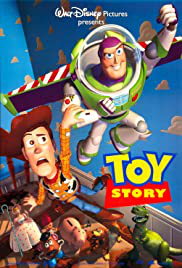

In [ ]:
import PIL
PIL.Image.open(filename)

Цикл для скачки может работать больше часа. Можно, но не обязательно, его распараллелить. Когда вы скачаете все данные, сделайте их бэкап на своём гугл-диске или на своём компьютере. Заархивировать папку вам поможет команда 

```
!zip -r images.zip images
```

После архив надо скачать (он будет лежать в файловом хранилище колаба).

In [ ]:
# Ваш код

  0%|          | 0/38670 [00:00<?, ?it/s]

2563

In [ ]:
# Как заархивировать и разархивировать:

# !zip -r images.zip images
# !unzip -q images.zip

In [ ]:
x = os.listdir('images')
len(x)

36108

__[0.1]__ выбросите из таблицы `MovieGenre.csv` все фильмы, которые не удалось скачать. 

In [ ]:
# Ваш код

Обратите внимание, что каждому фильму может соотвествовать несколько жанров. Они перечислены через разделитель `|`. 

In [ ]:
from collections import Counter
cnt = Counter([jtem for item in movies.Genre.values for jtem in item.split('|')])
cnt

Counter({'Action': 4867,
         'Adult': 8,
         'Adventure': 3486,
         'Animation': 1585,
         'Biography': 1818,
         'Comedy': 11501,
         'Crime': 4752,
         'Documentary': 3414,
         'Drama': 18185,
         'Family': 1907,
         'Fantasy': 1843,
         'Film-Noir': 330,
         'Game-Show': 1,
         'History': 1307,
         'Horror': 3678,
         'Music': 1163,
         'Musical': 738,
         'Mystery': 2170,
         'News': 78,
         'Reality-TV': 2,
         'Romance': 5555,
         'Sci-Fi': 1835,
         'Short': 863,
         'Sport': 640,
         'Talk-Show': 6,
         'Thriller': 4424,
         'War': 1063,
         'Western': 752})

__[0.2]__ Давайте немного подчистим таргет.  

- Удалите из данных все жанры, которые встречаются менее $100$ раз. От жанра Adult, к сожалению, придётся избавиться. Сохраните новые жанры в колонку `cleanGenre`.
- Если у фильма после чистки не осталось жанров, удалите строчку с ним из таблицы с данными.

In [1]:
# Ваш код

__[0.3]__ Разбейте выборку на train (80%) и validation (20%) случайным образом. Все файлы, которые будут в обучающей выборке, переложите в подпапку `images/train`. Все файлы, которые будут в валидационной выборке, переложите в подпапку `images/test`. Используйте для этого цикл и команду `os.rename(path, new_path)`.

In [3]:
# Ваш код

In [ ]:
!ls

images	      images_clean.zip	MovieGenre.csv	samplemovieposters
images_clean  images.zip	sample_data	SampleMoviePosters


Сделайте бэкап данных на свой гугл-диск. При решении дальнейших разделов используйте этот бэкап. Если вы решили, что не хотите решать часть, связанную с подготовкой данных, используйте мой бэкап. 

# 2. Поставка данных (2 балла) 

Если вы выполнили первую часть работы и скачали свои данные, используйте во всех дальнейших пунктах именно их. Если вы решили забить на подготовку данных, скачайте [мой вариант с гугл-диска.](https://drive.google.com/file/d/1SDMBNpWW9gKEWR4tmGacHUvKfrQnoNRY/view?usp=sharing) В моей папке следующая структура: 

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>images_clean</b>
|__ <b>train</b>
    |______ ['1972819_Drama.jpg', '132910_Action|Crime|Fantasy.jpg', '96804_Action|Drama.jpg'....]
|__ <b>test</b>
    |______ ['3732252_Drama.jpg', '1919184_Crime|Drama|Thriller.jpg', '43303_Comedy|Crime.jpg' ....]
|__ MovieGenre.csv
</pre>


При решении этого пункта не возбраняется ориентироваться [вот на эту тетрадку.](https://github.com/ashrefm/multi-label-soft-f1/blob/master/Multi-Label%20Image%20Classification%20in%20TensorFlow%202.0.ipynb)

In [ ]:
# Скачиваем данные && разархивируем их && удаляем архив 
# !gdown --id 1SDMBNpWW9gKEWR4tmGacHUvKfrQnoNRY && unzip -q images_clean.zip && rm images_clean.zip

In [ ]:
path = os.getcwd()

root_train = path + '/images_clean/train'
root_val = path + '/images_clean/test'

movies = pd.read_csv(path + "/images_clean/MovieGenre.csv", encoding="ISO-8859-1")

# по id выдаёт название фильма
imdbId2Title = dict(zip(movies.imdbId.values, movies.Title.values))

In [ ]:
# Проверка все ли жанры из трэйна присутствуют в валидации

uniq_train_genres = sorted(set([jtem for item in os.listdir(root_train) for jtem in item.split('_')[-1].split('.')[0].split("|")]))
uniq_val_genres = sorted(set([jtem for item in os.listdir(root_val) for jtem in item.split('_')[-1].split('.')[0].split("|")]))

assert uniq_train_genres == uniq_val_genres

UNIQ_GENRES = np.array(uniq_train_genres)


> В этой части задания вам предстоит написать итераторы для дальнейшей работы с данными. Для этого нужно заполнить в функциях ниже все пропуски, а также дописать недостающие. Если вы не хотите писать итераторы, сразу переходите к обучению нейросетей. В таком случае вы не получите баллы за этот пункт. 

Для начала напишем несколько вспомогательных мелких функций. 

In [ ]:
def parse_name(
        filename: str
    ) -> Tuple[int, List[str]]:
    """Считывает путь, вытаскивает из него id и жанры
    Args:
        filename: имя файла
    """
    # ваш код
    idd, genres = ...
    genres = ...
    return int(idd), genres


ex_id, ex_genres = parse_name('132910_Action|Crime|Fantasy.jpg')
assert ex_id == 132910
assert set(ex_genres) == {'Action', 'Crime', 'Fantasy'}

In [ ]:
def get_target(
        genres: List[str], 
        uniq_genres: List[str]=UNIQ_GENRES
    ) -> tf.constant:
    """Возвращает по жанрам таргет
    Args:
        genres: жанры текущего постера
        uniq_genres: уникальные жанры, присутствуюшие в выборке
    """
    
    # ваш код 

    return tf.constant(y) 

y = get_target(['Action', 'Crime', 'Fantasy'])
assert (y.numpy() == np.array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])).all()

In [ ]:
def decode_img(
        path: str, 
        img_shape: Tuple[int, int]
    ) -> tf.constant:
    """Считываеет картинку и меняет её размер
    Args:
        path: путь к картинке
        img_shape: размер после ресайза
    """
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, img_shape)

132910_Action|Crime|Fantasy.jpg
132910
[1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(134, 91, 3)


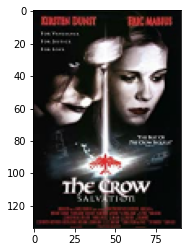

In [ ]:
def get_sample(
        path: str, 
        img_shape: Tuple[int, int]=(268, 182)
    ) -> Tuple[int, tf.constant, tf.constant]:
    """ Возвращает одно наблюдение id, таргет, картинка
    Args:
        path: путь к картинке
        img_shape: размер после ресайза
    """
    X = decode_img(path, img_shape)

    if isinstance(path, str):
        filename = path.split("/")[-1]
    else:
        filename = tf.strings.split(path, '/')[-1] # для работы с итератором

    idd, genres = parse_name(filename)
    y = get_target(genres)
    return idd, y, X

# Считаем какую-нибудь картинку и убедимся, что выдаётся что-то похожее на правду
idd, y, X = get_sample(root_train + "/" + '132910_Action|Crime|Fantasy.jpg', (134, 91))
print(idd)
print(y.numpy())
print(X.numpy().shape)
plt.imshow(X.numpy());

In [ ]:
def normalize_image(
        idd: int, 
        y: tf.constant,
        X: tf.constant
    ) -> Tuple[int, tf.constant, tf.constant]:
    """ Отображает картинку на отрезок [-1; 1], idd и таргет не меняет
    Args:
        idd: путь к картинке
        y: таргет
        X: картинка
    """
    
    X_norm = ... # ваш код

    return idd, y, X_norm

# Протестируем функцию на картинке из предыдущей функции
idd_n, y_n, X_n = normalize_image(idd, y, X)

assert idd_n == idd
assert (y == y_n).numpy().all()
assert np.abs(X_n.numpy().min() + 1) < 1e-8
assert np.abs(X_n.numpy().max() - 1) < 1e-8

Объединим все эти маленькие функции в создатель итераторов. 

In [ ]:
def create_dataset(
        path: str, 
        is_training: bool = True,
        shuffle_buffer_size: int = 2000,
        batch_size: int = 32,
        input_shape: Tuple[int, int] = (134, 91) # чтобы быстрее работало
    ):
    """Подгружает и создаёт Dataset
    Args:
        path: путь к папке с изображениями
        is_training: обучающий это датасет или тестовый
        shuffle_buffer_size:
        batch_size:
        input_shape:
    """

    ds = tf.data.Dataset.list_files(path + "/*.jpg", shuffle=True)
    lambda get_s : get_sample(path, input_shape=input_shape)
    ds = ds.map(get_sample, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.map(normalize_image)

    if is_training == True:
        ds = ds.cache()
        # Перемешиваемм данные с соотвествующим буфером
        dataset = dataset.shuffle(buffer_size=shuffle_buffer_size)
    
    # Батчуем данные
    ds = ds.batch(batch_size)

    # Погрузка батчей на фоне, пока модель учится для оптимизации времени
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds 

Создайте датасеты для обучения и валидации. Убедитесь что они работают. 


In [3]:
# Размер исходных картинок: (268, 182)
INPUT_SHAPE = (134, 91) # чтобы быстрее работало (можно не сжимать в 2 раза)

# Ваш код


# 3. Собственные архитектуры (3 балла). 

> В этой части задания вам предстоит написать и обучить две собственные нейросетевые архитектуры. Они должны отличаться друг от друга. Например, это могут быть RESNET и обычная свёрточная сетка. За это вы получите 1 балл. Для его получения достаточно обучить все три модели методом `.fit`. За качественно проделанные с этими архитектурами эксперименты вы получите ещё 2 балла. Если все эксперименты сделаны через метод `.fit`, вы получите 1 балл. Если вы напишите свой собственный цикл для обучения модели и попробуйте поэкспериментировать с ним, вы можете расчитывать на 2 балла. 

Если вы написали в предыдущем пункте итераторы, используйте их. Если нет, подгрузите данные с помощью кода, приведённого ниже. 

Скорее всего, на весь объём картинок в колабе не хватит места. Сделать ресайз в 4 раза. Либо запускайте на своём компе. Можно учить модель на части изображений, но надо понимать что её качество будет хуже.

In [ ]:
def decode_img(
        path: str, 
        img_shape: Tuple[int, int]
    ) -> tf.constant:
    """Считываеет картинку и меняет её размер
    Args:
        path: путь к картинке
        img_shape: размер после ресайза
    """
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, img_shape)

In [ ]:
val_files = os.listdir(root_val)
train_files = os.listdir(root_train)

X_val = np.array([decode_img(root_val + '/' + item) for item in val_files])
X_train = np.array([decode_img(root_train + '/' + item) for item in train_files])
X_train.shape, X_val.shape    

__[0.1 балл]__  Как будем применять нейросеть на новых данных? На какой таргет будем обучаться? 

__Ответ:__ 

__[0.9 балла]__ Для начала попробуем обучить несколько собственных нейронок. Собирите три принципиально различающиеся друг от друга архитектуры и обучите их. 

Архитектуры принципиально отличаются друг от друга, если в них закладываются разные идеи. Например, это могут быть полносвязная сеть, свёрточная сеть, ResNet, Inception, DenseNet и т.п. 

In [ ]:
# Ваш код

__[2 балла]__ Теперь нам нужна модель, которая даст на тестовой выборке  __accuracy больше 50%.__ Если удастся, пробейте порог в __70%.__  Если не выйдет, просто поставьте несколько экспериментов.

Можно использовать абсолютно всё, что вы знаете: любые активации, слои, сколь угодно большие свёрточные слои и глубокие сети. Единственное, нельзя использовать предобученные сети и дополнительные данные. 

__Главное правило: одно изменение на эксперимент.__   Если у вас есть 2 идеи по улучшению сети, сначала попробуйте их независимо. Может оказаться, что одно из них дало __+10%__ точности а другое __-7%__. А вы так и будете думать, что сделали 2 полезных изменения которые в сумме дают __+3%__. Если какая-то идея не работает — даже если она вам нравится - опишите ее и выкидывайте из дальнейших экспериментов. 

* __Дропаут.__ может помочь обучеть нейросетку в несколько раз глубже и избежать переобучения. Это круто, но не стоит сразу ставить дропаут в $0.5$. Слишком сильный дропаут приводет к недообучению (underfitting).  Более того, дропаут замедляет обучение. Если пытаетесь пробовать его, начинайте с не очень больших значений.

* __Аугментация данных.__ На паре мы обсуждали, что если котов и собак чуток повращать и погнуть, они всё ещё останутся таковыми, а модель получит новую пищу для размышления. Для того, чтобы проделать трюк с аугментацией, придётся немного подрихтовать генератор данных. Для тестовой выборки не надо ничего аугментировать. Это нечестно. Обратите внимание, что если вы сами не в состоянии понять что за картинка перед вами, то и сеть тоже это не поймёт. 

* __Прекратитеть стакать слои!__ Есть более эффективные идеи. Реализуйте на Keras свой ResNet слой или свой Inception слой. Придётся написать немного кода в функциональном стиле, но я верю в вас.  Ещё можете попробовать Densely-connected convolutions и многие другие идеи. Для вдохновения [можете сходить сюда.](https://habr.com/ru/company/ods/blog/343822/)  Не надо только копировать огромные архитектуры под чистую, вам точно хватит более маленькой сетки. 

* __Долго != плохо__. Более глубокие архитектуры обычно требуют бОльше эпох до сходимости. Это значит, что в первые несколько эпох они могут быть хуже менее глубоких аналогов. Дайте им время, запаситесь чаем и обмажьтесь batch-norm-ом.

* Обязательно попробуйте поставить расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать. В таком случае лучше учить модель с помощью цикла, а не метода `.fit`. 


In [ ]:
# тут будет код :3

Опишите свои <s>ощущения</s> результаты от проведенных экспериментов. Может быть несколько проще, если писать этот отчет сразу после каждого эксперимента.

__Отчёт об экспериментах:__ 

текст c отчётом писать тут ...




# 4. Эмбеддинги картинок (1 балл)

__[0.2]__ Подгрузите из зоопарка Tensorflow-моделей любую на свой вкус. Срежьте у неё последние слои, создав тем самым экстрактор фичей. 


In [ ]:
# тут будет код :3

__[0.2]__ Прогоните экстракторо через обучающую и тестовую выборки. Сохраните получившиеся эмбеддинги в отдельные матрицы.

In [ ]:
# тут будет код :3

__[0.2]__ С помощью TSNE визуализируйте тестовую выборку. Раскрасьте точки в соотвествии с жанрами. Если у точки несколько жанров, выберите любой. Видно ли что-то интересное в полученной визуализации? 

In [ ]:
# тут будет код :3

__[0.4]__ Подгрузите из `catboost` градиентный бустинг и обучите его классифицировать картинки. В качестве фичей используйте выделенные на прошлых шагах эмбеддинги. Каким оказыватся качество алгоритма на тестовой выборке?

In [ ]:
# тут будет код :3

# 5. Transfer learning

__[1 балл]__ Попробуем трансфер-лёрнинг!

- Возьмите базовую сетку из предыдущего пунтка. Срежьте у неё последние сслои. Заморозьте в ней все параметры. 
- Добавьте поверх базовой части свою маленькую сетку.
- Обучите добавленную часть.

In [ ]:
# тут будет код :3

__[1 балл]__ Повторите то же самое упражнение, но теперь добавьте на этап обучения аугментацию данных.

In [ ]:
# тут будет код :3

# 6. Дообучение (fine-tuning)

__[1]__ Попробуем сделать дообучение нейронной сети: 

- Возьмите базовую сетку из предыдущего пунтка. Срежьте у неё последние сслои. НЕ ЗАМОРАЖИВАЙТЕ её параметры. Они должны обучаться вместе со всей сетью. 
- Добавьте поверх базовой части свою маленькую сетку.
- Обучите получившуюся архитектуру. 



In [ ]:
# тут будет код :3

Подведём итоги. Какая из моделей показала самое хорошее качество? Какая оказалась самой плохой? Какие из архитектур получилось побить с помощью градиентного бустинга?

__Ответ:__ ...

# 7. Что видит наша нейроcеть

В этом разделе вам предстоит взять уже обученную свёрточную архитектуру (VGG-16) и проанализировать, что именно она видит.

<img align="center" src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network-1-e1542973058418.jpg" width="500">

Подгрузите VGG-16 из зоопарка моделей. 

In [ ]:
model = ... 

input_shape = model.layers[0].output_shape[0][1:3]
input_shape

Подгрузите из интернета любую классную картинку. 

/root/.keras/datasets/cat.jpg


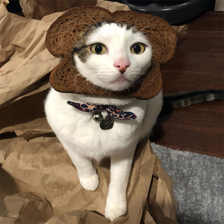

In [ ]:
from tensorflow.keras.utils import get_file

import PIL.Image
import numpy as np

href = 'https://sadanduseless.b-cdn.net/wp-content/uploads/2019/06/cat-breading4.jpg'
image = get_file('cat.jpg', href)

print(image) # куда скачался то?! 

image = PIL.Image.open(image).resize(input_shape)
image 

Онормируйте пиксели картинки на отрезок $[-1,1]$.

In [ ]:
# Ваш код

## 7.1 Визуализируем карту фичей после каждого слоя

Вытащить карты фичей с каждого слоя и визуализируйте их для скаченной выше картинки. 

- создайте модель, которая будет выплёвывать для картинки промежуточные результаты свёрток
- прогоните картинку через созданную модель
- Визуализируйте изображения, которые получаются после каждой свёртки в matplotlib 

In [ ]:
# Ваш код

Проинтерпретируйте получившуюся картинку. Какие закономерности видны в этой визуализации? 

__Ответ:__  ...

## 7.2  Восходящий градиент 

Реализуем алгоритм восходящего градиента для какого-нибудь фильтра сетки.

__[0.1]__ Выбирете внутри сетки какой-то конкретный фильтр. Создайте модель, которая для картинки на входе, выплёвывает значения из этого фильтра на выходе.

In [ ]:
# тут будет код :3

__[0.1]__ Попробуем закинуть в нашу модель случайно сгенерированное изображение. Какие значения фильтра нейронка выплёвывает наружу?  

In [ ]:
# тут будет код :3

__[0.1]__ Хочется, чтобы средняя активация фильтра была максимально большой. Давайте возьмём эту активацию со знаком минус. Это наша функция потерь. Мы хотим закидывать в сетку такую картинку, которая возбудит фильтр сильнее всего, то есть минимизирует эти потери. 

Реализуйте такую функцию потерь. Какие потери мы терпим на случайно сгенерированном примере? 

In [ ]:
# тут будет код :3

__[0.1]__ Теперь нам хотелось бы начать менять пиксели случайного изображения так, чтобы минимизировать придуманные в предыдущем пункте потери. Тогда мы сможем понять какие именно контуры в нашем изображении воздействуют на текущий фильтр активнее всего. 

Поместите наше случайное изображение в `Variable` и напишите функцию, которая будет делать по его пикселям один шаг градиентного спуска, минимизирующий потери.

In [ ]:
# тут будет код :3

__[0.1]__ Делайте шаги, пока алгоритм не сойдётся. Постройте картинку с получившимся контуром, который улавливает выбранный вами фильтр. 

In [ ]:
# тут будет код :3

Попробуйте проделать ту же процедуру для других слоёв и фильтров. Только не надо заниматься копипастой кода, сразу же пишите удобные функции. 

In [ ]:
# тут будет код :3

## 7.3  ???

__[ещё 10]__ Есть огромное количество других способов визуализировать работу свёрточной сетки. Например, можно [пытаться искать конкретные области картинки,](https://jacobgil.github.io/deeplearning/class-activation-maps) на которые смотрит нейронка. На этой идее основаны разные механизмы внимания, которые сегодня активно используются в сетках. Попробуйте закодить его. 

In [ ]:
# тут будет код :3